In [1]:
# %%capture
# #Install tumor-tcell from one directory up
# !pip install ../

In [18]:
from bigraph_viz import plot_bigraph, convert_vivarium_composite
from tumor_tcell.experiments.main import large_experiment
from vivarium.core.engine import pf
from vivarium.core.composer import Composite

In [33]:
data, experiment = large_experiment(
        n_tcells=1,
        n_tumors=1,
        n_dendritic=1,
        n_tcells_lymph_node=2,
        tumors_state_PDL1n=0.5,
        tcells_total_PD1n=8,
        dendritic_state_active=0.5,
        lymph_nodes=True,
        total_time=0, 
        field_molecules=['IFNg', 'tumor_debris'],
        return_experiment=True,
    )

Initializing experiment tumor_tcell_20231015.101214


0it [00:00, ?it/s]

Completed in 0.00 seconds


In [34]:
composite = Composite(
    state=experiment.state.get_value(), 
    processes=experiment.state.get_processes(), 
    topology=experiment.state.get_topology(), 
    flow=experiment.state.get_flow(),
)
del composite['_schema']

In [41]:
print(pf(composite))

{ 'flow': {},
  'processes': { 'in_transit': { 'agents': { 'tcell_LN_0': { 't_cell': <tumor_tcell.processes.t_cell.TCellProcess object at 0x15c59d700>}}},
                 'lymph_node': { 'agents': { 'tcell_LN_1': { 't_cell': <tumor_tcell.processes.t_cell.TCellProcess object at 0x15c59ddf0>}}},
                 'lymph_node_transfer': <tumor_tcell.processes.lymph_node.LymphNode object at 0x15c57d7f0>,
                 'tumor_environment': { 'agents': { 'dendritic_0': { 'dendritic_cell': <tumor_tcell.processes.dendritic_cell.DendriticCellProcess object at 0x15c594880>},
                                                    'tcell_0': { 't_cell': <tumor_tcell.processes.t_cell.TCellProcess object at 0x15bf145b0>},
                                                    'tumor_0': { 'tumor': <tumor_tcell.processes.tumor.TumorProcess object at 0x15c58f5e0>}},
                                        'clock': <vivarium.processes.clock.Clock object at 0x15b1a16d0>,
                                   

In [35]:
bigraph_spec = convert_vivarium_composite(composite)

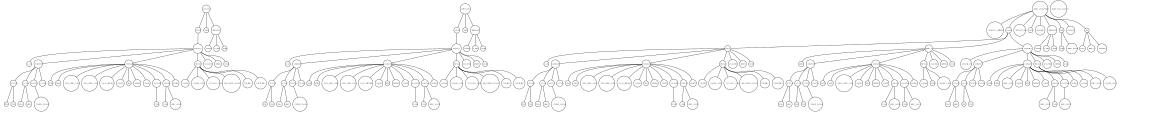

In [46]:
plot_bigraph(bigraph_spec,
             # dpi='500',
             # out_dir='out',
             # filename='tumor_tcell_bigraph',
            )

In [39]:
print(pf(bigraph_spec))

{ 'in_transit': { 'agents': { 'tcell_LN_0': { 'boundary': { 'LN_no_migration': False,
                                                            'PD1n_divide_count': 0,
                                                            'PD1p_divide_count': 0,
                                                            'cell_type': 't-cell',
                                                            'death': False,
                                                            'diameter': <Quantity(7.5, 'micrometer')>,
                                                            'divide': False,
                                                            'exchange': { 'IFNg': 0},
                                                            'external': { 'IFNg': 0.0,
                                                                          'tumor_debris': 0.0},
                                                            'location': [ <Quantity(600.0, 'micrometer')>,
                               

In [37]:
composite['processes']

{'tumor_environment': {'neighbors_multibody': <tumor_tcell.processes.neighbors.Neighbors at 0x15c394b50>,
  'agents': {'tcell_0': {'t_cell': <tumor_tcell.processes.t_cell.TCellProcess at 0x15bf145b0>},
   'tumor_0': {'tumor': <tumor_tcell.processes.tumor.TumorProcess at 0x15c58f5e0>},
   'dendritic_0': {'dendritic_cell': <tumor_tcell.processes.dendritic_cell.DendriticCellProcess at 0x15c594880>}},
  'diffusion_field': <tumor_tcell.processes.fields.Fields at 0x15b4ca970>,
  'clock': <vivarium.processes.clock.Clock at 0x15b1a16d0>},
 'lymph_node_transfer': <tumor_tcell.processes.lymph_node.LymphNode at 0x15c57d7f0>,
 'lymph_node': {'agents': {'tcell_LN_1': {'t_cell': <tumor_tcell.processes.t_cell.TCellProcess at 0x15c59ddf0>}}},
 'in_transit': {'agents': {'tcell_LN_0': {'t_cell': <tumor_tcell.processes.t_cell.TCellProcess at 0x15c59d700>}}}}

In [38]:
composite['topology']

{'tumor_environment': {'neighbors_multibody': {'cells': ('agents',)},
  'agents': {'tcell_0': {'t_cell': {'internal': ('internal',),
     'boundary': ('boundary',),
     'globals': ('boundary',),
     'neighbors': ('neighbors',)},
    'local_field': {'exchanges': ('boundary', 'exchange'),
     'location': ('boundary', 'location'),
     'fields': ('..', '..', 'fields'),
     'dimensions': ('..', '..', 'dimensions')},
    'division': {'global': ('boundary',), 'agents': ('..', '..', 'agents')},
    'death': {'trigger': ('boundary', 'death'),
     'agents': ('..', '..', 'agents')}},
   'tumor_0': {'tumor': {'internal': ('internal',),
     'boundary': ('boundary',),
     'globals': ('boundary',),
     'neighbors': ('neighbors',)},
    'local_field': {'exchanges': ('boundary', 'exchange'),
     'location': ('boundary', 'location'),
     'fields': ('..', '..', 'fields'),
     'dimensions': ('..', '..', 'dimensions')},
    'division': {'global': ('boundary',), 'agents': ('..', '..', 'agents')}